# Main Predict: Passing Grades (Quality Education)

### Overview of Data

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
import warnings
np.random.seed(999)
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, matthews_corrcoef

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('student-mat.csv',delimiter=',')
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [ ]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [ ]:
df.shape

(395, 33)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [ ]:
df.describe(include='all')

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395,395,395.000000,395,395,395,395.000000,395.000000,395,395,...,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
unique,2,2,NaN,2,2,2,NaN,NaN,5,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,GP,F,NaN,U,GT3,T,NaN,NaN,other,other,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,349,208,NaN,307,281,354,NaN,NaN,141,217,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,16.696203,NaN,NaN,NaN,2.749367,2.521519,NaN,NaN,...,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,NaN,NaN,1.276043,NaN,NaN,NaN,1.094735,1.088201,NaN,NaN,...,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,NaN,NaN,15.000000,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,NaN,NaN,16.000000,NaN,NaN,NaN,2.000000,2.000000,NaN,NaN,...,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,NaN,NaN,17.000000,NaN,NaN,NaN,3.000000,2.000000,NaN,NaN,...,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,NaN,NaN,18.000000,NaN,NaN,NaN,4.000000,3.000000,NaN,NaN,...,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000


### Feature Engineering

In [ ]:
# Calculate the mean of 'G1', 'G2', and 'G3'
mean_grade = df[['G1', 'G2', 'G3']].mean(axis=1)

# Create a new column based on the mean
df['result'] = mean_grade.apply(lambda x: 'pass' if x >= 10 else 'fail')
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,result
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,fail
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,fail
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,fail
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,pass
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,fail


In [ ]:
df_encode = {"sex": {"F":1,"M" :0}} #Female = 1 or Male = 1
df = df.replace(df_encode)

df_encode = {"school": {"GP":1,"MS" :0}} #'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira
df = df.replace(df_encode)

df_encode = {"address": {"U":1,"R" :0}} #Urban = 1 or Rural = 0
df = df.replace(df_encode)

df_encode = {"famsize": {"GT3":1,"LE3" :0}}
df = df.replace(df_encode)

df_encode = {"Pstatus": {"A":1,"T" :0}} #0 = T = living together or 1 = 'A' = apart)
df = df.replace(df_encode)

df_encode = {"Mjob": {"other":4,"health":3,"services" :2,"teacher":1,"at_home" :0}} #other=4,health=3,services=2,teacher=1,at_home=0
df = df.replace(df_encode)

df_encode = {"Fjob": {"other":4,"health":3,"services" :2,"teacher":1,"at_home" :0}} #other=4,health=3,services=2,teacher=1,at_home=0
df = df.replace(df_encode)

df_encode = {"reason": {"home":0,"reputation":1,"course" :2,"other" : 3}} #other=3,course =2,reputation=1,close to home=0
df = df.replace(df_encode)

df_encode = {"guardian": {"mother":0, "father":1 , "other": 2}} #other=3,course =2,reputation=1,close to home=0
df = df.replace(df_encode)

df_encode = {"reason": {"home":0,"reputation":1,"course" :2,"other" : 3}} #other=3,course =2,reputation=1,close to home=0
df = df.replace(df_encode)

df_encode = {"schoolsup": {"no":0,"yes":1}}
df = df.replace(df_encode)

df_encode = {"famsup": {"no":0,"yes":1}}
df = df.replace(df_encode)

df_encode = {"paid": {"no":0,"yes":1}}
df = df.replace(df_encode)

df_encode = {"activities": {"no":0,"yes":1}}
df = df.replace(df_encode)

df_encode = {"nursery": {"no":0,"yes":1}}
df = df.replace(df_encode)

df_encode = {"higher": {"no":0,"yes":1}}
df = df.replace(df_encode)

df_encode = {"internet": {"no":0,"yes":1}}
df = df.replace(df_encode)

df_encode = {"romantic": {"no":0,"yes":1}}
df = df.replace(df_encode)

df_encode = {"result": {"fail":0,"pass":1}}
df = df.replace(df_encode)

df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,result
0,1,1,18,1,1,1,4,4,0,1,...,3,4,1,1,3,6,5,6,6,0
1,1,1,17,1,1,0,1,1,0,4,...,3,3,1,1,3,4,5,5,6,0
2,1,1,15,1,0,0,1,1,0,4,...,3,2,2,3,3,10,7,8,10,0
3,1,1,15,1,1,0,4,2,3,2,...,2,2,1,1,5,2,15,14,15,1
4,1,1,16,1,1,0,3,3,4,4,...,3,2,1,2,5,4,6,10,10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,0,0,20,1,0,1,2,2,2,2,...,5,4,4,5,4,11,9,9,9,0
391,0,0,17,1,0,0,3,1,2,2,...,4,5,3,4,2,3,14,16,16,1
392,0,0,21,0,1,0,1,1,4,4,...,5,3,3,3,3,3,10,8,7,0
393,0,0,18,0,0,0,3,2,2,4,...,4,1,3,4,5,0,11,12,10,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   school      395 non-null    int64
 1   sex         395 non-null    int64
 2   age         395 non-null    int64
 3   address     395 non-null    int64
 4   famsize     395 non-null    int64
 5   Pstatus     395 non-null    int64
 6   Medu        395 non-null    int64
 7   Fedu        395 non-null    int64
 8   Mjob        395 non-null    int64
 9   Fjob        395 non-null    int64
 10  reason      395 non-null    int64
 11  guardian    395 non-null    int64
 12  traveltime  395 non-null    int64
 13  studytime   395 non-null    int64
 14  failures    395 non-null    int64
 15  schoolsup   395 non-null    int64
 16  famsup      395 non-null    int64
 17  paid        395 non-null    int64
 18  activities  395 non-null    int64
 19  nursery     395 non-null    int64
 20  higher      395 non-null    int6

In [ ]:
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,result
0,1,1,18,1,1,1,4,4,0,1,...,3,4,1,1,3,6,5,6,6,0
1,1,1,17,1,1,0,1,1,0,4,...,3,3,1,1,3,4,5,5,6,0
2,1,1,15,1,0,0,1,1,0,4,...,3,2,2,3,3,10,7,8,10,0
3,1,1,15,1,1,0,4,2,3,2,...,2,2,1,1,5,2,15,14,15,1
4,1,1,16,1,1,0,3,3,4,4,...,3,2,1,2,5,4,6,10,10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,0,0,20,1,0,1,2,2,2,2,...,5,4,4,5,4,11,9,9,9,0
391,0,0,17,1,0,0,3,1,2,2,...,4,5,3,4,2,3,14,16,16,1
392,0,0,21,0,1,0,1,1,4,4,...,5,3,3,3,3,3,10,8,7,0
393,0,0,18,0,0,0,3,2,2,4,...,4,1,3,4,5,0,11,12,10,1


In [ ]:
data = df.drop(['G1', 'G2', 'G3', 'result'], axis = 1)  # Drop the 'G1', 'G2', 'G3', and 'result' columns and store the result in the variable 'data'
target = df['result']  # Store the 'result' column in the variable 'target'

In [ ]:
print(target.value_counts())

1    231
0    164
Name: result, dtype: int64


# Feature Scaling

In [ ]:
df_unscaled=data.values
scaled_df = preprocessing.MinMaxScaler().fit_transform(df_unscaled)

In [ ]:
pd.DataFrame(scaled_df, columns=data.columns).head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
0,1.0,1.0,0.428571,1.0,1.0,1.0,1.00,1.00,0.00,0.25,...,1.0,0.0,0.0,0.75,0.50,0.75,0.00,0.00,0.5,0.080000
1,1.0,1.0,0.285714,1.0,1.0,0.0,0.25,0.25,0.00,1.00,...,1.0,1.0,0.0,1.00,0.50,0.50,0.00,0.00,0.5,0.053333
2,1.0,1.0,0.000000,1.0,0.0,0.0,0.25,0.25,0.00,1.00,...,1.0,1.0,0.0,0.75,0.50,0.25,0.25,0.50,0.5,0.133333
3,1.0,1.0,0.000000,1.0,1.0,0.0,1.00,0.50,0.75,0.50,...,1.0,1.0,1.0,0.50,0.25,0.25,0.00,0.00,1.0,0.026667
4,1.0,1.0,0.142857,1.0,1.0,0.0,0.75,0.75,1.00,1.00,...,1.0,0.0,0.0,0.75,0.50,0.25,0.00,0.25,1.0,0.053333


# Feature Selection And Ranking

Using 1-nearest neighbor classifier will be used to compare the performance of feature selection methods: F-Score and Random Forest Importance also using stratified 150-fold cross validation with 20 repetitions for assessment.

In [ ]:
clf = KNeighborsClassifier(n_neighbors=150)
cv_method = RepeatedStratifiedKFold(n_splits=150, n_repeats=20,random_state=999)

Full Selection

In [ ]:
from sklearn.model_selection import cross_val_score
cv_results_full = cross_val_score(estimator=clf,
                             X=scaled_df,
                             y=target,
                             cv=cv_method,
                             scoring='roc_auc')
cv_results_full.mean()

0.6875833333333333

AUC score dari keseluruhan fitur hanya 0.557 sehingga ada fitur irrelevan di dalam dataset yang mengurangi performa model

Decision Tree Importance

In [ ]:
from sklearn.tree import DecisionTreeClassifier
np.random.seed(999)
model_rfi = DecisionTreeClassifier(random_state = 42)
model_rfi.fit(scaled_df, target)
fs_indices_rfi = np.argsort(model_rfi.feature_importances_)[::-1][0:20]

best_features_rfi = data.columns[fs_indices_rfi].values
print(best_features_rfi)

feature_importances_rfi = model_rfi.feature_importances_[fs_indices_rfi]
print(feature_importances_rfi)

['failures' 'freetime' 'absences' 'Fedu' 'studytime' 'schoolsup' 'goout'
 'health' 'guardian' 'Mjob' 'Fjob' 'reason' 'Walc' 'Medu' 'traveltime'
 'sex' 'age' 'famsize' 'nursery' 'famrel']
[0.11821772 0.10902391 0.07068668 0.0594452  0.04814124 0.04700624
 0.04320359 0.0431367  0.04103749 0.03925379 0.03634373 0.03520363
 0.03482468 0.03345833 0.03021157 0.0295355  0.02857114 0.02122073
 0.01999221 0.01604938]


In [ ]:
cv_results_rfi_DT = cross_val_score(estimator=model_rfi,
                             X=scaled_df[:, fs_indices_rfi],
                             y=target,
                             cv=cv_method,
                             scoring='roc_auc')
cv_results_rfi_DT.mean()

0.5960833333333333

F1 Score

In [ ]:
from sklearn import feature_selection as fs
np.random.seed(999)
fs_fit_fscore = fs.SelectKBest(fs.f_classif, k=10)
fs_fit_fscore.fit_transform(scaled_df, target)
fs_indices_fscore = np.argsort(fs_fit_fscore.scores_)[::-1][0:10]
best_features_fscore = data.columns[fs_indices_fscore].values
print(best_features_fscore)
feature_importances_fscore = fs_fit_fscore.scores_[fs_indices_fscore]
print(feature_importances_fscore)

['failures' 'schoolsup' 'Medu' 'Fedu' 'goout' 'higher' 'age' 'sex'
 'internet' 'studytime']
[53.87857482 18.46248481 12.17973914 11.40816613  8.31282332  7.12932355
  5.76404007  5.72065689  5.58809819  4.7416653 ]


In [ ]:
cv_results_fscore_ROC = cross_val_score(estimator=clf,
                             X=scaled_df[:, fs_indices_fscore],
                             y=target,
                             cv=cv_method,
                             scoring='roc_auc')
print("ROC_AUC: ",cv_results_fscore_ROC.mean())

cv_results_fscore_MCC = cross_val_score(estimator=clf,
                             X=scaled_df[:, fs_indices_fscore],
                             y=target,
                             cv=cv_method,
                             scoring=mcc_scorer)
print("MCC: ",cv_results_fscore_MCC.mean())

ROC_AUC:  0.7008333333333333
MCC:  0.029666666666666668


## Random Forest Importance

In [ ]:
from sklearn.ensemble import RandomForestClassifier
np.random.seed(999)
model_rfi = RandomForestClassifier(n_estimators=20)
model_rfi.fit(scaled_df, target)
fs_indices_rfi = np.argsort(model_rfi.feature_importances_)[::-1][0:20]

best_features_rfi = data.columns[fs_indices_rfi].values
print(best_features_rfi)

feature_importances_rfi = model_rfi.feature_importances_[fs_indices_rfi]
print(feature_importances_rfi)

['failures' 'absences' 'freetime' 'health' 'goout' 'Fedu' 'Medu' 'Mjob'
 'age' 'reason']
[0.08015133 0.07842659 0.05476447 0.05275528 0.05042799 0.0504111
 0.04949373 0.04693127 0.04420546 0.0415666 ]


In [ ]:
cv_results_rfi = cross_val_score(estimator=clf,
                             X=scaled_df[:, fs_indices_rfi],
                             y=target,
                             cv=cv_method,
                             scoring='roc_auc')
cv_results_rfi.mean()

0.6316666666666667

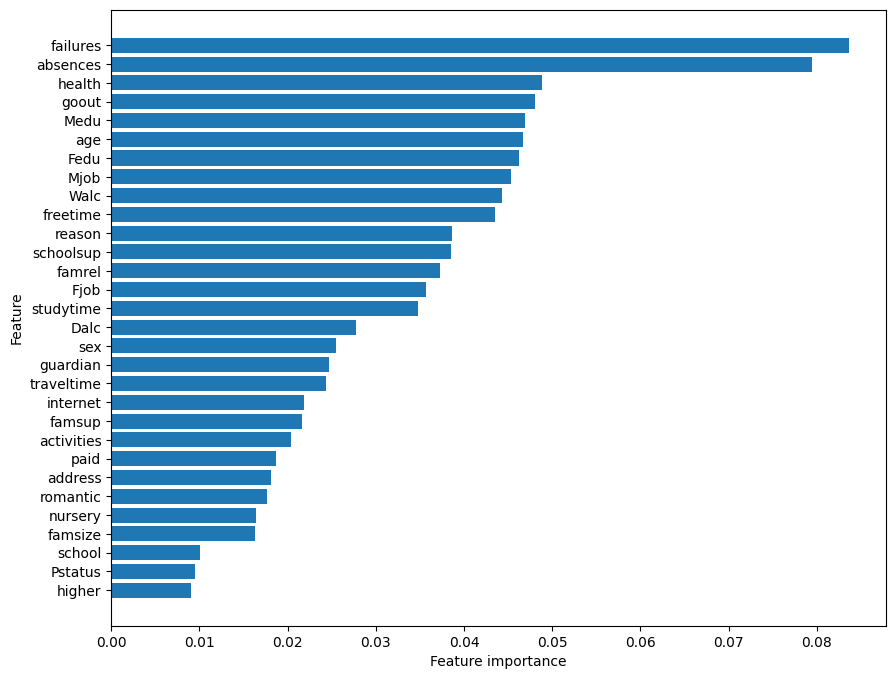

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Train the random forest model
model = RandomForestClassifier(n_estimators=150, random_state=69)
model.fit(scaled_df, target)
fs_indices_rfi = np.argsort(model.feature_importances_)[::-1][0:15]
# Get the feature importances
importances = model.feature_importances_

# Sort the feature importances
sorted_indices = importances.argsort()
sorted_features = data.columns[sorted_indices]

# Plot the feature importances
plt.figure(figsize=(10, 8))
plt.barh(range(data.shape[1]), importances[sorted_indices], align='center')
plt.yticks(range(data.shape[1]), sorted_features)
plt.xlabel('Feature importance')
plt.ylabel('Feature')
plt.show()

In [ ]:
cv_results_rfi = cross_val_score(estimator=clf,
                             X=scaled_df[:, fs_indices_rfi],
                             y=target,
                             cv=cv_method,
                             scoring='roc_auc')
cv_results_rfi.mean()

0.69175

F1 Score

In [ ]:
from sklearn import feature_selection as fs
np.random.seed(999)
fs_fit_fscore = fs.SelectKBest(fs.f_classif, k=15)
fs_fit_fscore.fit_transform(scaled_df, target)
fs_indices_fscore = np.argsort(fs_fit_fscore.scores_)[::-1][0:15]
best_features_fscore = data.columns[fs_indices_fscore].values
print(best_features_fscore)
feature_importances_fscore = fs_fit_fscore.scores_[fs_indices_fscore]
print(feature_importances_fscore)

['failures' 'schoolsup' 'Medu' 'Fedu' 'goout' 'higher' 'age' 'sex'
 'internet' 'studytime' 'traveltime' 'address' 'Walc' 'famsup' 'absences']
[53.87857482 18.46248481 12.17973914 11.40816613  8.31282332  7.12932355
  5.76404007  5.72065689  5.58809819  4.7416653   3.37495665  3.36569019
  3.12970953  2.49041052  1.82417932]


In [ ]:
cv_results_fscore_ROC = cross_val_score(estimator=clf,
                             X=scaled_df[:, fs_indices_fscore],
                             y=target,
                             cv=cv_method,
                             scoring='roc_auc')
print("ROC_AUC: ",cv_results_fscore_ROC.mean())

cv_results_fscore_MCC = cross_val_score(estimator=clf,
                             X=scaled_df[:, fs_indices_fscore],
                             y=target,
                             cv=cv_method,
                             scoring=mcc_scorer)
print("MCC: ",cv_results_fscore_MCC.mean())

ROC_AUC:  0.7204166666666667
MCC:  0.030166666666666668


Berdasarkan skor MCC dan ROC AUC yang diberikan, kinerja pengklasifikasi tidak memuaskan. Skor ROC AUC sebesar 0,7204166666666667 menunjukkan bahwa model mampu membedakan kelas positif dan negatif sampai batas tertentu, tetapi tidak dengan akurasi yang tinggi. Skor MCC sebesar 0,030166666666666668 menunjukkan tingkat korelasi yang sangat rendah antara kelas yang diprediksi dan kelas yang sebenarnya, menunjukkan bahwa kinerja pengklasifikasi buruk, karena tidak secara efektif membedakan antara kelas positif dan negatif.

Performance Comparison Using Paired T-Tests

In [ ]:
from scipy import stats
print(stats.ttest_rel(cv_results_full, cv_results_fscore).pvalue.round(3))
print(stats.ttest_rel(cv_results_full, cv_results_rfi).pvalue.round(3))
print(stats.ttest_rel(cv_results_rfi, cv_results_fscore).pvalue.round(3))

0.0
0.982
0.0


# Feature Performance

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
cv_method = RepeatedStratifiedKFold(n_splits = 5,n_repeats=3,random_state=999)

NameError: ignored